<a href="https://colab.research.google.com/github/likhitharigela/Bank-Mgt-System-DS-Cpp/blob/master/BWtoColour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the data

import os
os.environ["KAGGLE_CONFIG_DIR"]="/content/drive/MyDrive/Data/kaggle"

In [2]:
! kaggle datasets download -d theblackmamba31/landscape-image-colorization

Dataset URL: https://www.kaggle.com/datasets/theblackmamba31/landscape-image-colorization
License(s): unknown
 99% 189M/192M [00:02<00:00, 109MB/s]
100% 192M/192M [00:02<00:00, 97.4MB/s]


In [3]:
!unzip /content/landscape-image-colorization.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape Images/gray/2914.jpg  
  inflating: landscape Images/gray/2915.jpg  
  inflating: landscape Images/gray/2916.jpg  
  inflating: landscape Images/gray/2917.jpg  
  inflating: landscape Images/gray/2918.jpg  
  inflating: landscape Images/gray/2919.jpg  
  inflating: landscape Images/gray/292.jpg  
  inflating: landscape Images/gray/2920.jpg  
  inflating: landscape Images/gray/2921.jpg  
  inflating: landscape Images/gray/2922.jpg  
  inflating: landscape Images/gray/2923.jpg  
  inflating: landscape Images/gray/2924.jpg  
  inflating: landscape Images/gray/2925.jpg  
  inflating: landscape Images/gray/2926.jpg  
  inflating: landscape Images/gray/2927.jpg  
  inflating: landscape Images/gray/2928.jpg  
  inflating: landscape Images/gray/2929.jpg  
  inflating: landscape Images/gray/293.jpg  
  inflating: landscape Images/gray/2930.jpg  
  inflating: landscape Images/gray/2931.jpg  
  inflating: landscape Images/g

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import  rgb2lab , lab2rgb
from skimage.io import imread, imshow
import shutil
import os


In [5]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers, losses
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
IMG_SIZE = 160
IMAGE_SHAPE = [160,160]

In [7]:
def load_images_from_folder(folderName):
    image_list =[]
    for fileIndex in range(7000):
      img = cv2.imread("/content/landscape Images/"+folderName+"/"+str(fileIndex)+".jpg")
      if folderName == "color":
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        try:
          img = img.reshape(IMG_SIZE,IMG_SIZE,3)
        except:
          img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
          img = img.reshape(IMG_SIZE,IMG_SIZE,3)
      else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        try:
          img = img.reshape(IMG_SIZE,IMG_SIZE,1)
        except:
          img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
          img = img.reshape(IMG_SIZE,IMG_SIZE,1)
      image_list.append(img)
    return image_list
color = np.empty((0,IMG_SIZE,IMG_SIZE,3))
gray = np.empty((0,IMG_SIZE,IMG_SIZE,1))
color  = np.append(color,load_images_from_folder(r"color"),0)
gray  = np.append(gray,load_images_from_folder(r"gray"),0)

In [8]:
gray.shape

(7000, 160, 160, 1)

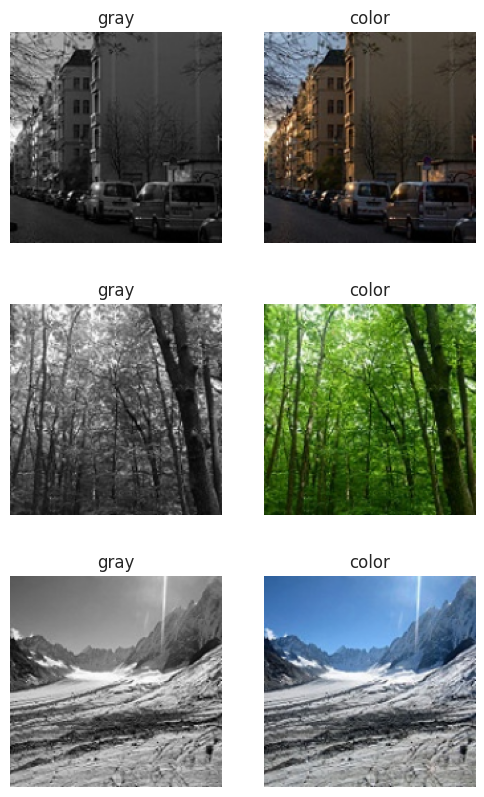

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 10))
for i in range(0,6,2):
  ax = plt.subplot(3, 2, i + 1)
  plt.imshow(cv2.cvtColor(gray[i].astype('uint8'), cv2.COLOR_BGR2RGB))
  plt.title("gray")
  plt.axis("off")
  ax = plt.subplot(3, 2, i + 2)
  plt.imshow(color[i].astype('uint8'))
  plt.title("color")
  plt.axis("off")

In [10]:
color /= 255
gray /= 255

In [11]:
def Colorizer(input_shape):
  encoder_input = keras.Input(shape=input_shape)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(encoder_input)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(256, (5, 5), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)(x)

  encoder_output =  layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(x)

  x = layers.UpSampling2D((2, 2))(encoder_output)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.UpSampling2D((2, 2))(encoder_output)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', strides=1)(x)
  decoder_output = layers.UpSampling2D((2, 2))(x)
  return keras.Model(encoder_input, decoder_output, name="decoder")

colorizer = Colorizer((160,160,1))

In [12]:
colorizer.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 256)       295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 256)       1638

In [13]:
def loss(y_true,y_pred) :
    l = tf.sqrt(tf.reduce_mean(tf.square(tf.abs(y_true - y_pred))))
    return l


In [14]:
colorizer.compile(loss=loss, optimizer='adam', metrics=['accuracy','mae','mse'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

train_generator = datagen.flow(gray[:3000], color[:3000], batch_size=32)
validation_generator = datagen.flow(gray[5000:7000], color[5000:7000], batch_size=32)

hist = colorizer.fit(train_generator, epochs=50, validation_data=validation_generator)


Epoch 1/50
94/94 [==============================] - 43s 287ms/step - loss: 0.1644 - accuracy: 0.4005 - mae: 0.1263 - mse: 0.0286 - val_loss: 0.1331 - val_accuracy: 0.3890 - val_mae: 0.0975 - val_mse: 0.0178
Epoch 2/50
94/94 [==============================] - 19s 203ms/step - loss: 0.1232 - accuracy: 0.4327 - mae: 0.0884 - mse: 0.0152 - val_loss: 0.1206 - val_accuracy: 0.4605 - val_mae: 0.0883 - val_mse: 0.0146
Epoch 3/50
94/94 [==============================] - 20s 211ms/step - loss: 0.1152 - accuracy: 0.4652 - mae: 0.0821 - mse: 0.0133 - val_loss: 0.1152 - val_accuracy: 0.5097 - val_mae: 0.0820 - val_mse: 0.0133
Epoch 4/50
94/94 [==============================] - 20s 211ms/step - loss: 0.1124 - accuracy: 0.4617 - mae: 0.0799 - mse: 0.0127 - val_loss: 0.1139 - val_accuracy: 0.4798 - val_mae: 0.0811 - val_mse: 0.0130
Epoch 5/50
94/94 [==============================] - 20s 209ms/step - loss: 0.1116 - accuracy: 0.4677 - mae: 0.0796 - mse: 0.0125 - val_loss: 0.1115 - val_accuracy: 0.4912 -

In [16]:
colorized_deneme = colorizer.predict(gray[6000:7000])

32/32 [==============================] - 3s 74ms/step


In [17]:
gray[0:1000].shape

(1000, 160, 160, 1)

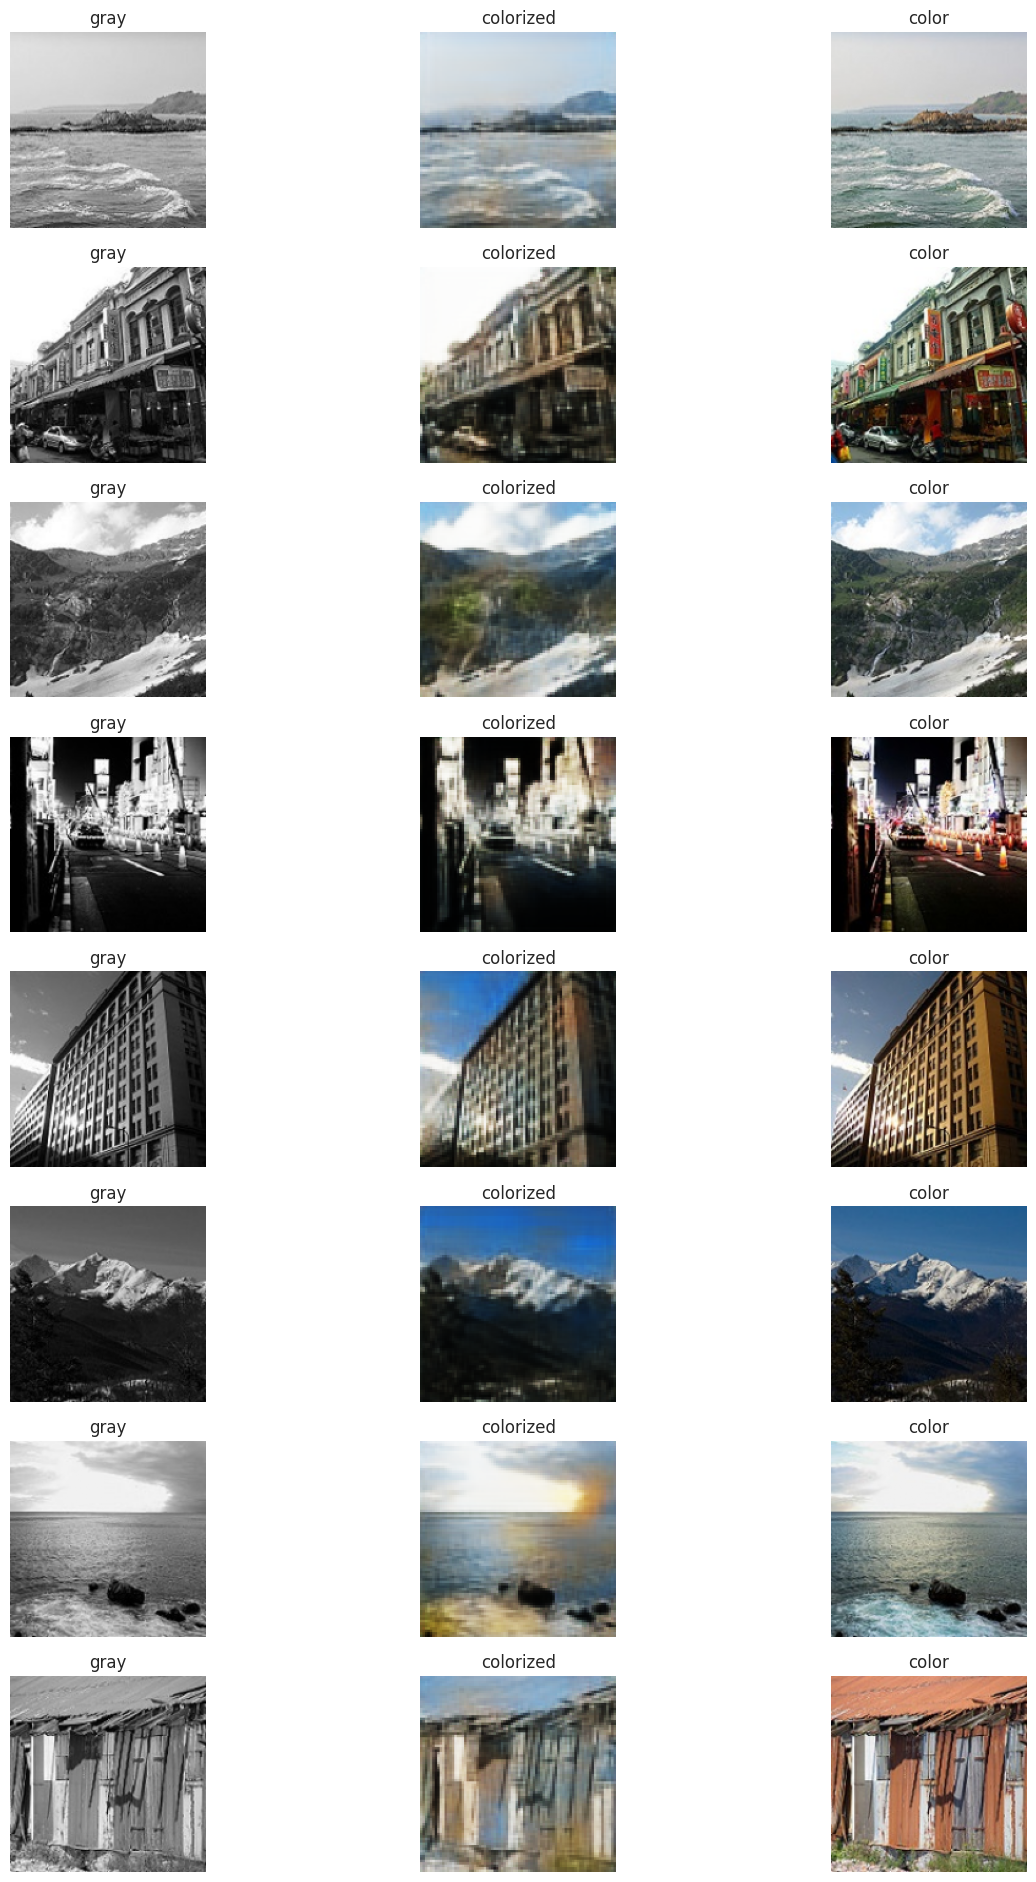

In [18]:
plt.figure(figsize=(15,30))
for i in range(6,30,3):
  ax = plt.subplot(10, 3, i + 1)
  plt.imshow(cv2.cvtColor(gray[6000+i].astype("float32"), cv2.COLOR_BGR2RGB))
  plt.title("gray")
  plt.axis('off')
  ax = plt.subplot(10, 3, i + 2)
  plt.imshow(colorized_deneme[i])
  plt.title("colorized")
  plt.axis('off')
  ax = plt.subplot(10, 3, i + 3)
  plt.imshow(color[6000+i])
  plt.title("color")
  plt.axis('off')

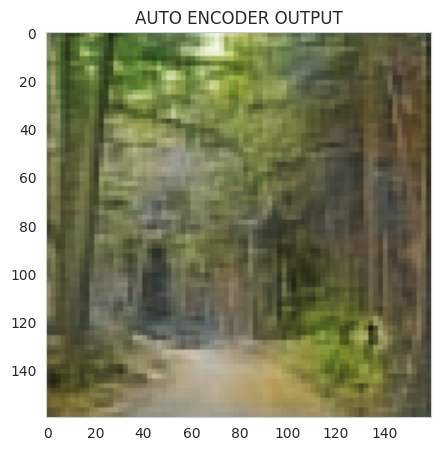

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(colorized_deneme[0])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)

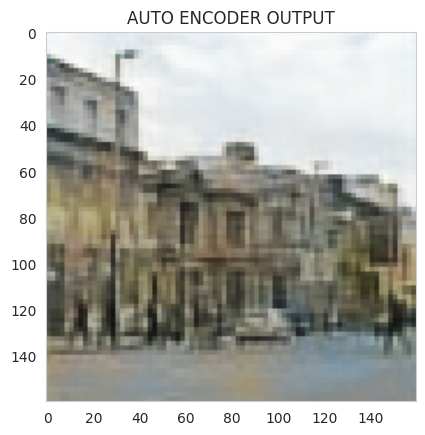

In [20]:
plt.imshow(colorized_deneme[64])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)

In [21]:
colorized_deneme.shape

(1000, 160, 160, 3)

In [22]:
img2 = cv2.imread("/content/landscape Images/color/1000.jpg").astype("float32")
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
try:
    img2 = img2.reshape(IMG_SIZE,IMG_SIZE,1)
except:
    img2 = cv2.resize(img2,(IMG_SIZE,IMG_SIZE))
    img2 = img2.reshape(IMG_SIZE,IMG_SIZE,1)

In [23]:
img2 = img2.reshape(1, 160, 160, 1)

In [24]:
img2.shape

(1, 160, 160, 1)

In [25]:
img2

array([[[[217.961   ],
         [210.711   ],
         [205.74225 ],
         ...,
         [191.84375 ],
         [190.90625 ],
         [190.      ]],

        [[217.961   ],
         [215.63873 ],
         [214.23834 ],
         ...,
         [190.9375  ],
         [190.      ],
         [189.09375 ]],

        [[222.7805  ],
         [221.73265 ],
         [218.8498  ],
         ...,
         [190.78384 ],
         [189.84634 ],
         [188.9401  ]],

        ...,

        [[ 54.708626],
         [ 56.74769 ],
         [ 59.401493],
         ...,
         [ 86.61638 ],
         [ 68.895905],
         [ 66.82204 ]],

        [[ 73.68559 ],
         [ 57.842674],
         [ 48.917126],
         ...,
         [ 62.42786 ],
         [ 41.504177],
         [ 66.00125 ]],

        [[ 55.083   ],
         [ 43.779343],
         [ 44.499157],
         ...,
         [ 54.923344],
         [ 42.17775 ],
         [ 75.709   ]]]], dtype=float32)

In [26]:
img2[0] = img2[0]/255.0

In [27]:
img2

array([[[[0.854749  ],
         [0.82631767],
         [0.8068324 ],
         ...,
         [0.75232846],
         [0.748652  ],
         [0.74509805]],

        [[0.854749  ],
         [0.8456421 ],
         [0.84015036],
         ...,
         [0.7487745 ],
         [0.74509805],
         [0.7415441 ]],

        [[0.873649  ],
         [0.8695398 ],
         [0.85823447],
         ...,
         [0.7481719 ],
         [0.74449545],
         [0.7409415 ]],

        ...,

        [[0.21454363],
         [0.22253996],
         [0.23294704],
         ...,
         [0.33967206],
         [0.27018002],
         [0.2620472 ]],

        [[0.2889631 ],
         [0.22683401],
         [0.19183187],
         ...,
         [0.24481514],
         [0.16276148],
         [0.25882843]],

        [[0.21601176],
         [0.1716837 ],
         [0.1745065 ],
         ...,
         [0.21538566],
         [0.16540293],
         [0.29689804]]]], dtype=float32)

In [28]:
zezo= colorizer.predict(img2)

1/1 [==============================] - 1s 637ms/step


In [29]:
zezo.shape

(1, 160, 160, 3)

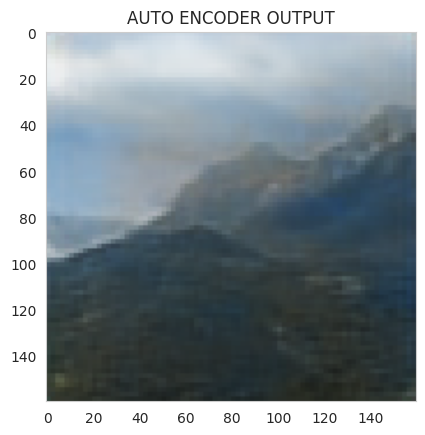

In [30]:
plt.imshow(zezo[0])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)

In [31]:
! pip install pyyaml h5py


In [32]:
colorizer.save('/content/drive/MyDrive/saved_models/autoencoder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.8 MB/s eta 0:00:00


In [40]:
import streamlit as st
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the saved model
def loss(y_true, y_pred):
    l = tf.sqrt(tf.reduce_mean(tf.square(tf.abs(y_true - y_pred))))
    return l

model = load_model('/content/drive/MyDrive/saved_models/autoencoder.h5', custom_objects={'loss': loss})

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (160, 160))
    image = image.reshape((1, 160, 160, 1))
    image = image / 255.0
    return image

def postprocess_image(image):
    image = image * 255
    image = image.astype(np.uint8)
    return image

st.title("Image Colorization")

uploaded_file = st.file_uploader("Choose a grayscale image...", type="jpg")

if uploaded_file is not None:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)

    st.image(image, channels="BGR", caption="Uploaded Image", use_column_width=True)

    processed_image = preprocess_image(image)
    colorized_image = model.predict(processed_image)
    colorized_image = postprocess_image(colorized_image[0])

    st.image(colorized_image, channels="RGB", caption="Colorized Image", use_column_width=True)


In [41]:
!ngrok config add-authtoken 2iJRPjPgIW4qizfo618kplcKlJd_6VuQf7M7u1anGq7HNLnhz

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Terminate any existing tunnels
ngrok.kill()

# Start a new tunnel
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app is live at: {public_url}")

# Run the Streamlit app
!streamlit run app.py

Streamlit app is live at: NgrokTunnel: "https://ea6b-34-125-38-128.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.38.128:8501

2024-06-24 05:56:00.976683: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 05:56:00.976730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 05:56:00.978052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 05:56:02.148217: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc